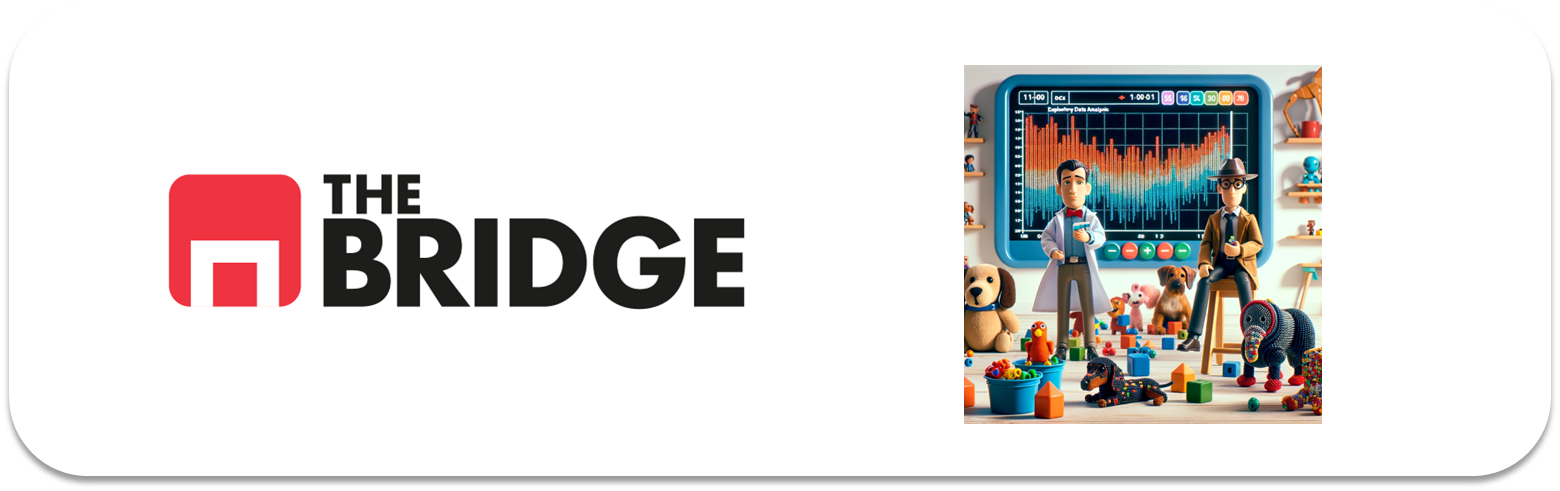

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [29]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [30]:
df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"], inplace=True)

In [31]:
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [32]:
df_titanic_copia = df_titanic.copy()

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [33]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

In [34]:
df_titanic.drop(columns=["parch", "sibsp"], inplace=True)

In [35]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [36]:
df_titanic.loc[df_titanic["embark_town"].isna(), "embark_town"] = df_titanic.embark_town.mode()[0]

In [37]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [38]:
filtro_man = df_titanic.who == "man"
filtro_woman = df_titanic.who == "woman"

In [39]:
df_titanic.loc[filtro_man & df_titanic["age"].isna(), "age"] = int(df_titanic[filtro_man]["age"].mean())

In [40]:
df_titanic.loc[filtro_woman & df_titanic["age"].isna(), "age"] = int(df_titanic[filtro_woman]["age"].mean())

In [41]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

##### 1. Supervivencia según sexo y etapa de la vida

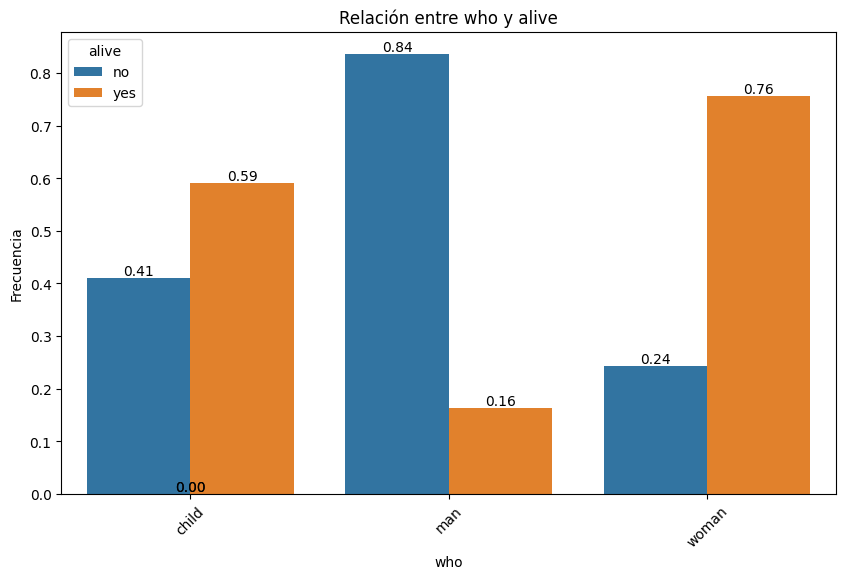

In [45]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True, relative_freq=True)

In [44]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['who'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


*Encontramos una relación significativa entre el sexo y la supervivencia*

##### 2. Supervivencia según clase

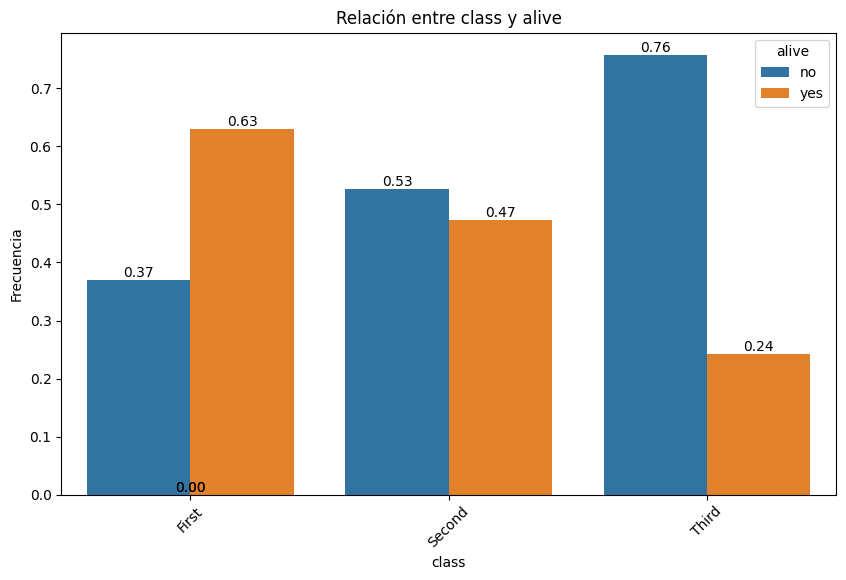

In [46]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values= True, relative_freq=True)

In [47]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['class'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


*Encontramos una relación significativa entre el la clase y la supervivencia*

##### 3. Supervivencia según ciudad en la que se embarcó

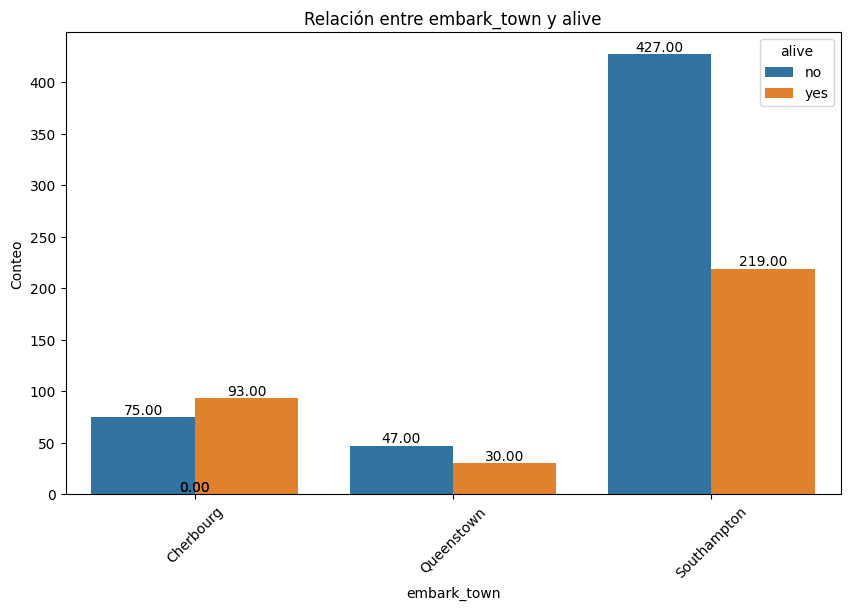

In [50]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True)

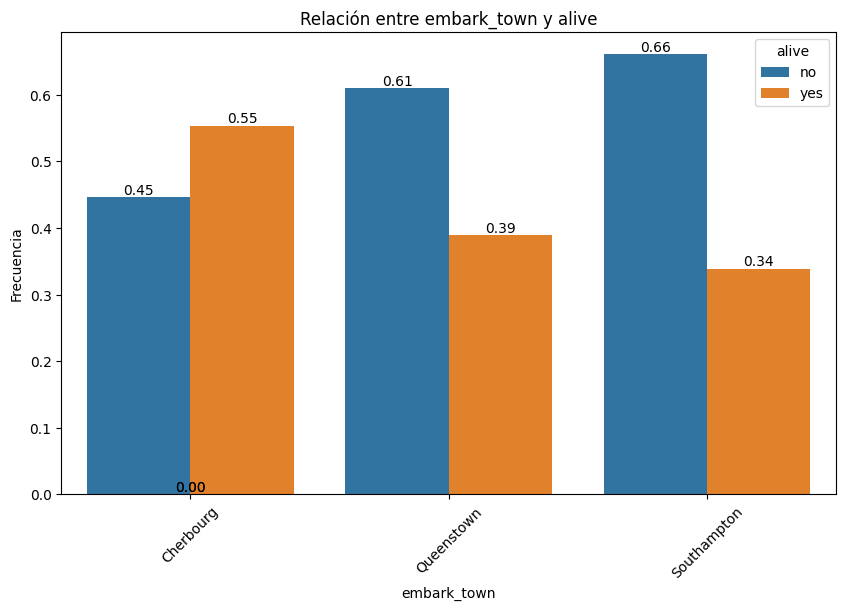

In [49]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True, relative_freq=True)

In [52]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


*La ciudad de la que más gente sobrevivió fue Southampton, pero debido a que la mayoría de pasajeros eran de allí. En términos relativos, sobrevivió un mayor porcentaje de Cherbourg.*


*Sí encontramos una relación significativa entre la ciudad de embarque y la supervivencia.*

##### 4. Relación entre precio del pasaje y supervivencia

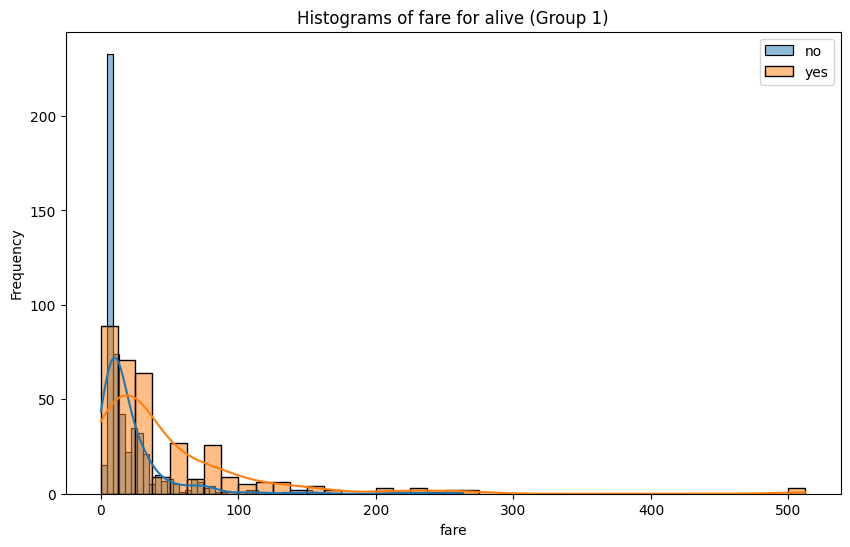

In [53]:
plot_grouped_histograms(df_titanic, cat_col="alive",num_col="fare", group_size= 2)

*Podemos observar en el histograma que la gente que pagó pasajes más caros tuvieron una mayor tasa de supervivencia*.

##### 5. Qué paso con la persona que más pago y por qué hay pasajeros que no pagaron billete

In [57]:
df_titanic.loc[df_titanic.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.0,0.0,Third,man,True,Southampton,no,True,0
263,male,40.0,0.0,First,man,True,Southampton,no,True,0
271,male,25.0,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.0,0.0,Second,man,True,Southampton,no,True,0
302,male,19.0,0.0,Third,man,True,Southampton,no,True,0
413,male,33.0,0.0,Second,man,True,Southampton,no,True,0
466,male,33.0,0.0,Second,man,True,Southampton,no,True,0
481,male,33.0,0.0,Second,man,True,Southampton,no,True,0
597,male,49.0,0.0,Third,man,True,Southampton,no,True,0
633,male,33.0,0.0,First,man,True,Southampton,no,True,0


*No sabemos muy bien por qué hay pasajeros que no pagaron billete. Tendríamos que investigarlo. Podría ser simplemente porque no se recogieron esos datos o porque pertenecían a la tripulación.*

In [56]:
df_titanic.loc[df_titanic.fare == df_titanic.fare.max(), "alive"]

258    yes
679    yes
737    yes
Name: alive, dtype: object

*Las 3 personas que pagaron el mayor precio del billete sobrevivieron*

##### 6. Relación entre dinero pagado, ciudad de embarque y supervivencia

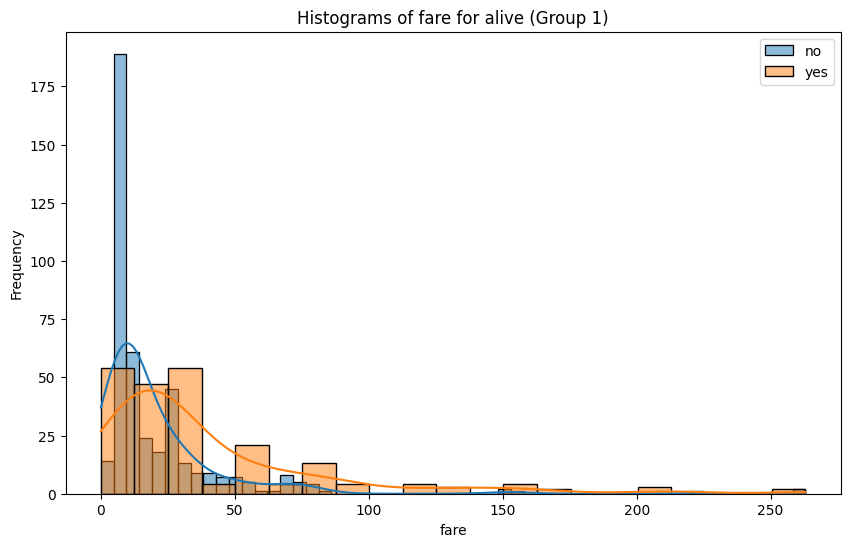

In [77]:
df_southampton = df_titanic.loc[df_titanic.embark_town == 'Southampton']
plot_grouped_histograms(df_southampton,"alive", "fare", group_size=2)

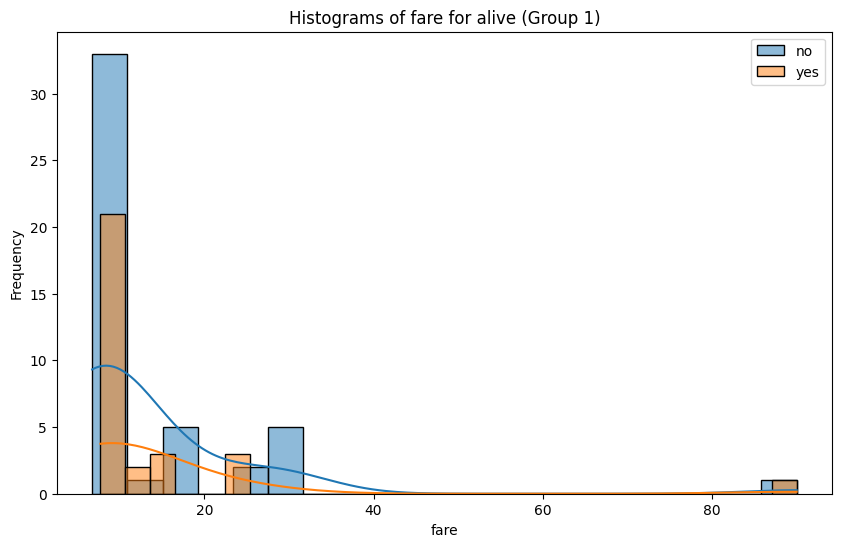

In [78]:
df_queenstown = df_titanic.loc[df_titanic.embark_town == 'Queenstown']
plot_grouped_histograms(df_queenstown,"alive", "fare", group_size=2)

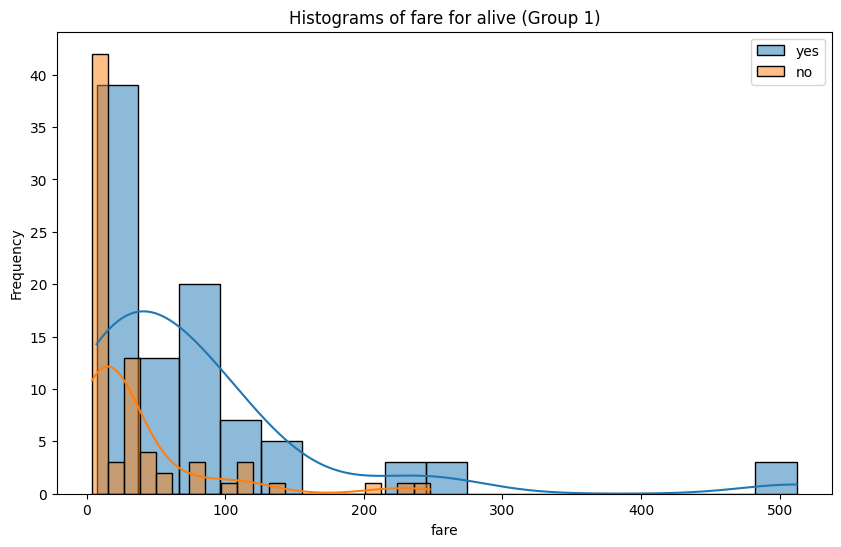

In [79]:
df_cherbourg = df_titanic.loc[df_titanic.embark_town == 'Cherbourg']
plot_grouped_histograms(df_cherbourg,"alive", "fare", group_size=2)

*En Queenstown no parece que haya relación entre el dinero pagado y la supervivencia, mientras que en las otras dos ciudades sí, porque observamos que la gente que pagó más por el billete, tiene una mayor tasa de supervivencia*.

##### 7. Qué agrupación de edad y clase tiene mayor supervivencia

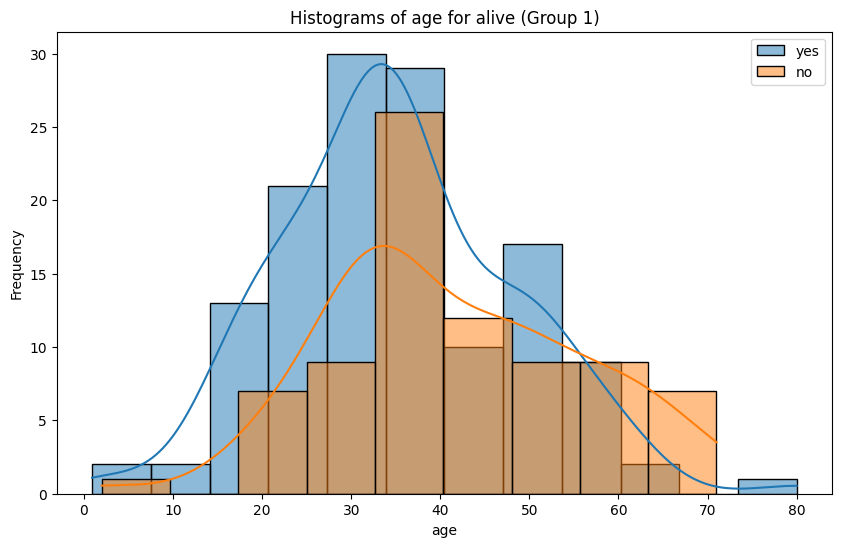

In [81]:
df_primera = df_titanic.loc[df_titanic["class"] == 'First']
plot_grouped_histograms(df_primera,"alive", "age", group_size=2)

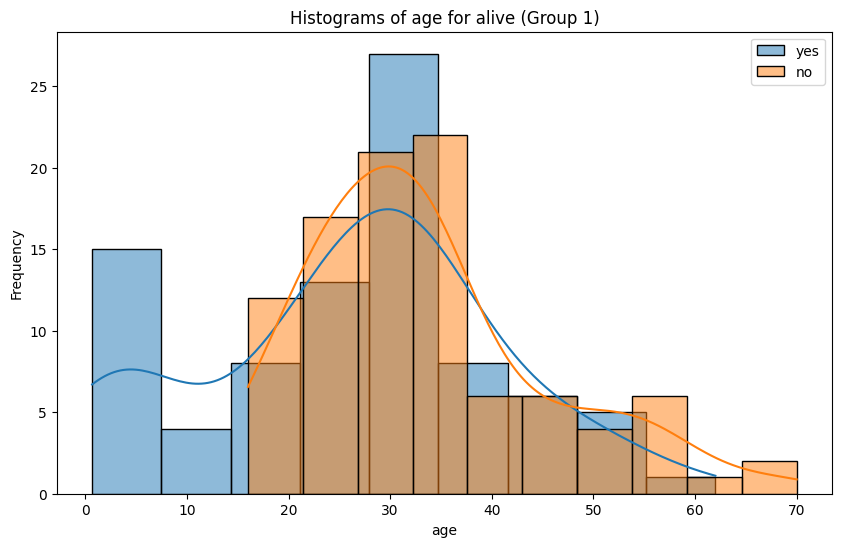

In [82]:
df_segunda = df_titanic.loc[df_titanic["class"] == 'Second']
plot_grouped_histograms(df_segunda,"alive", "age", group_size=2)

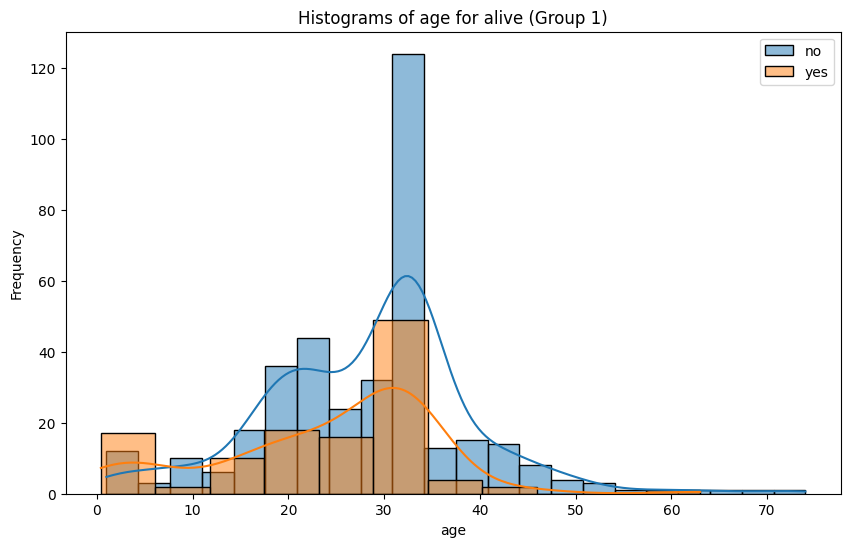

In [80]:
df_tercera = df_titanic.loc[df_titanic["class"] == 'Third']
plot_grouped_histograms(df_tercera,"alive", "age", group_size=2)

*En tercera clase murió mucha gente entre 20 y 40 años. En segunda clase murió más gente alrededor de los 30-35 años y en primera clase sobrevivió mucha gente de 20 a 40 años*

##### 8. Relación entre edad, coste del billete y supervivencia

Respuesta no:


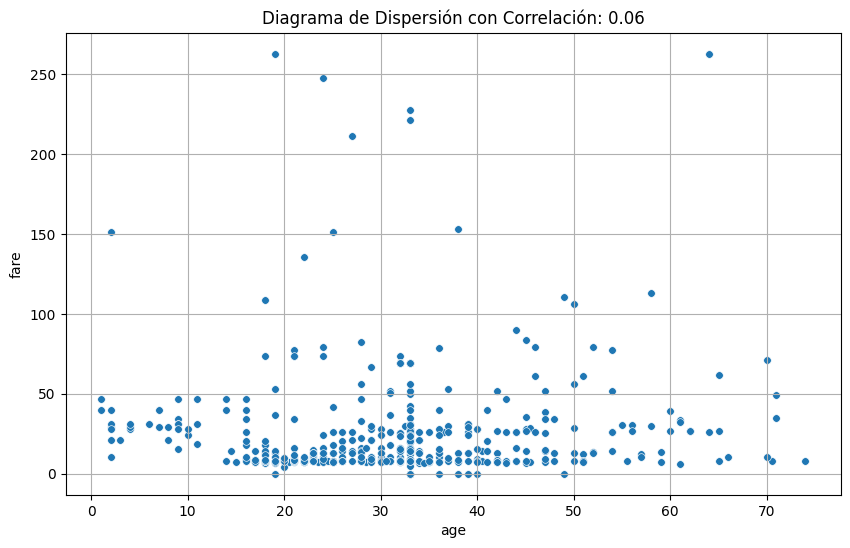

Respuesta yes:


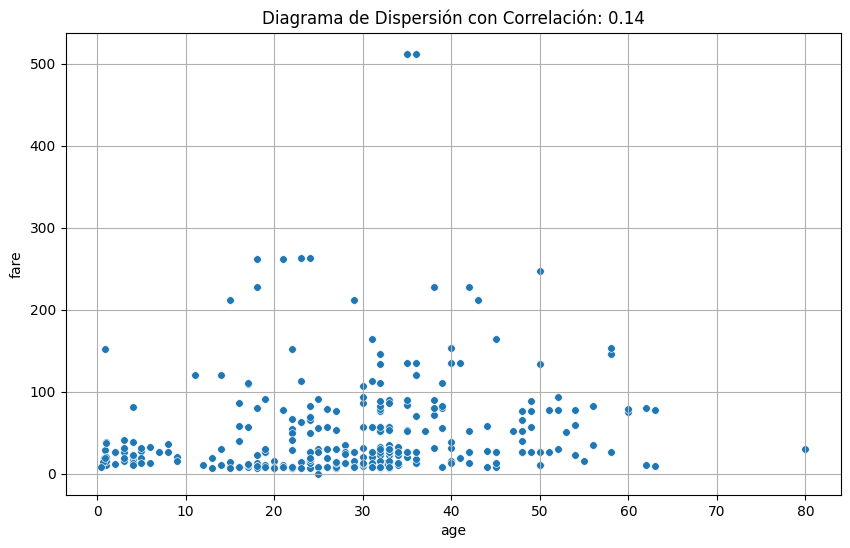

In [84]:
columnas = ["alive","fare","age"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=30, mostrar_correlacion= True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [4]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_viajes.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


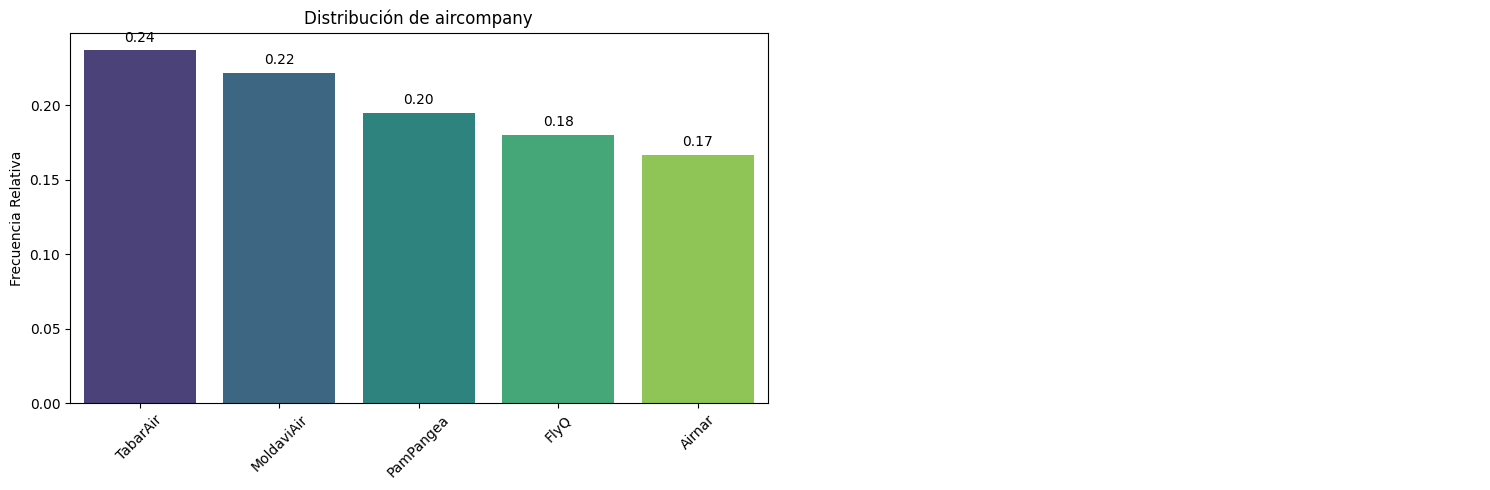

In [5]:
pinta_distribucion_categoricas(df_viajes,["aircompany"], relativa= True, mostrar_valores= True)

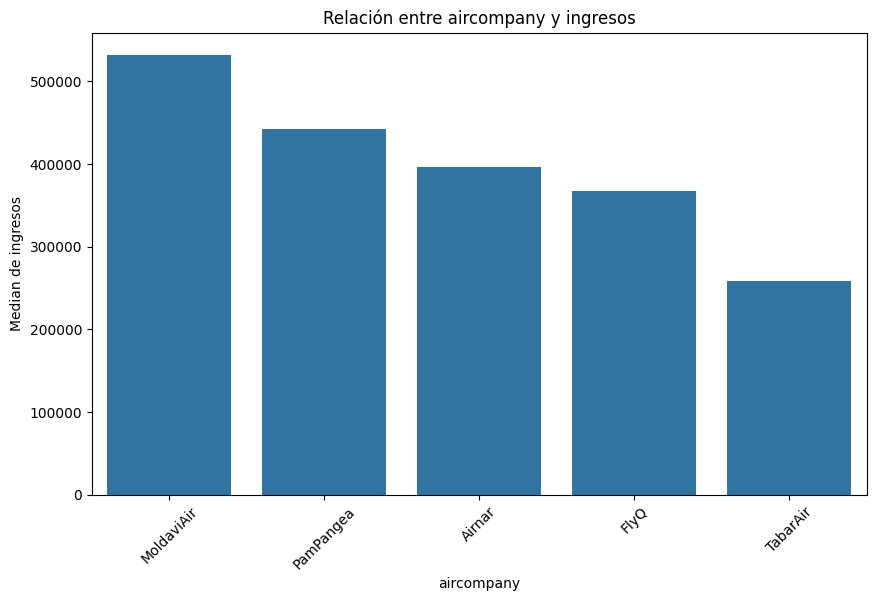

In [7]:
plot_categorical_numerical_relationship(df_viajes, "aircompany","ingresos",measure="median")

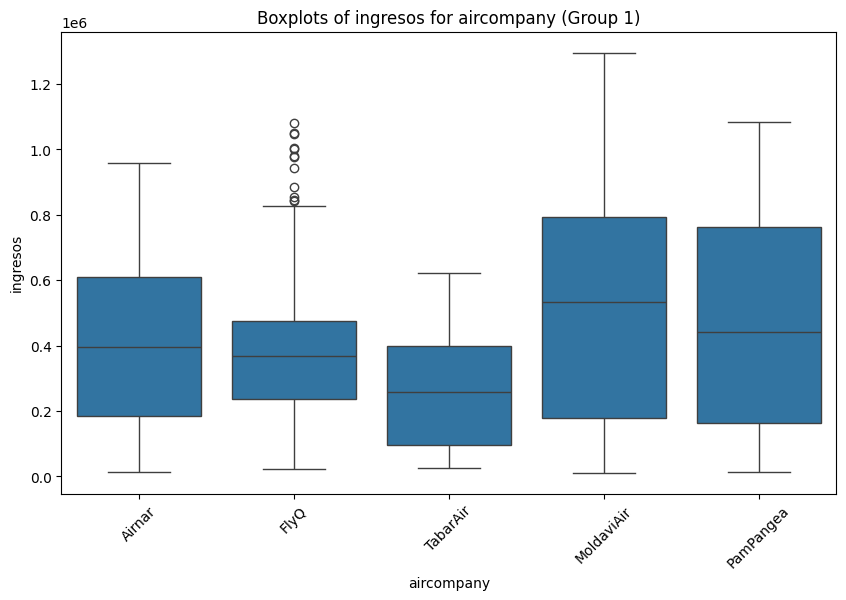

In [8]:
plot_grouped_boxplots(df_viajes,"aircompany","ingresos")

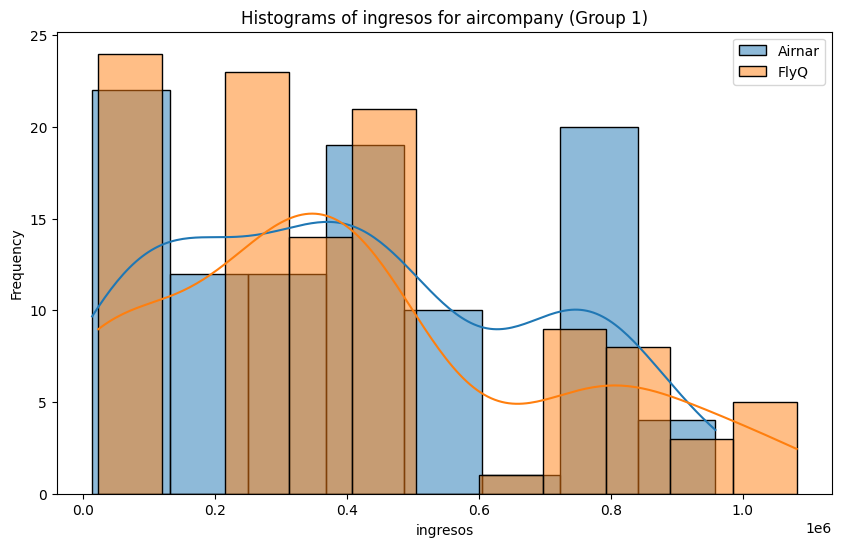

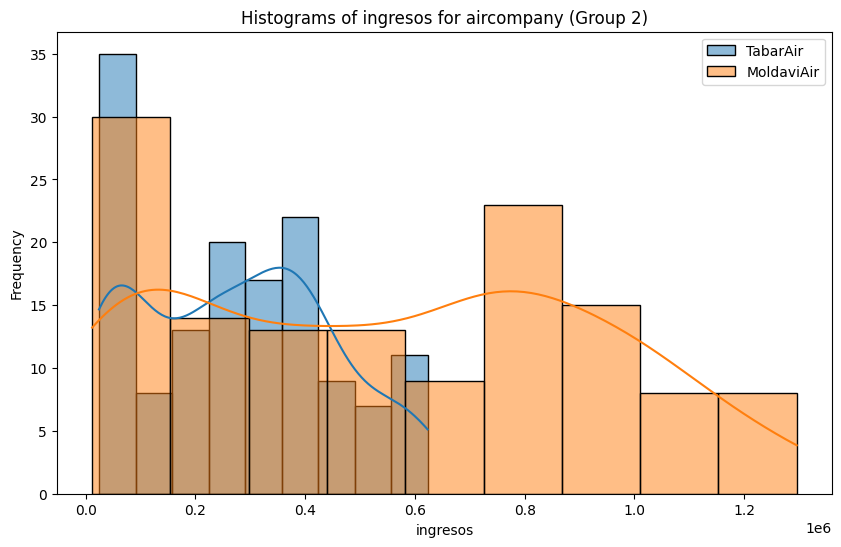

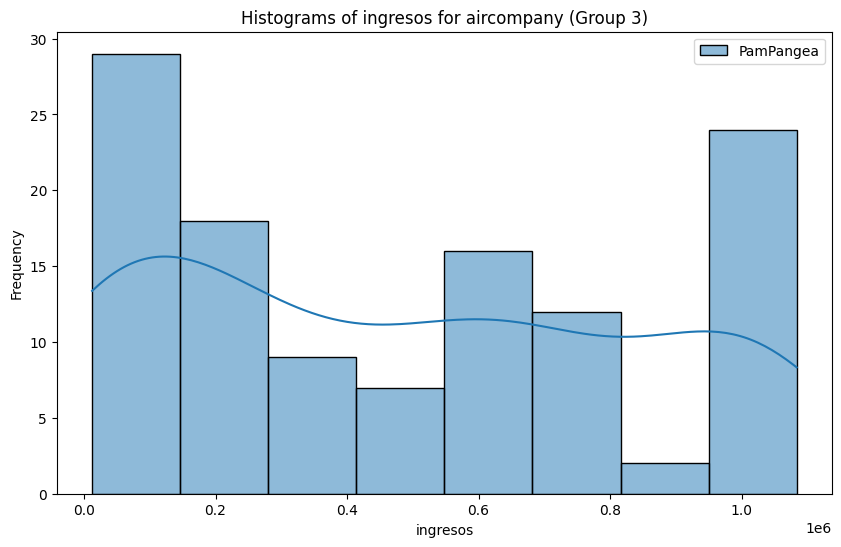

In [9]:
plot_grouped_histograms(df_viajes,"aircompany", "ingresos", 2)

*Nos llamó la atención que Airnar tiene menos vuelos, pero mejores ingresos en comparación con TabarAir, que tiene muchos vuelos y pocos ingresos.*

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


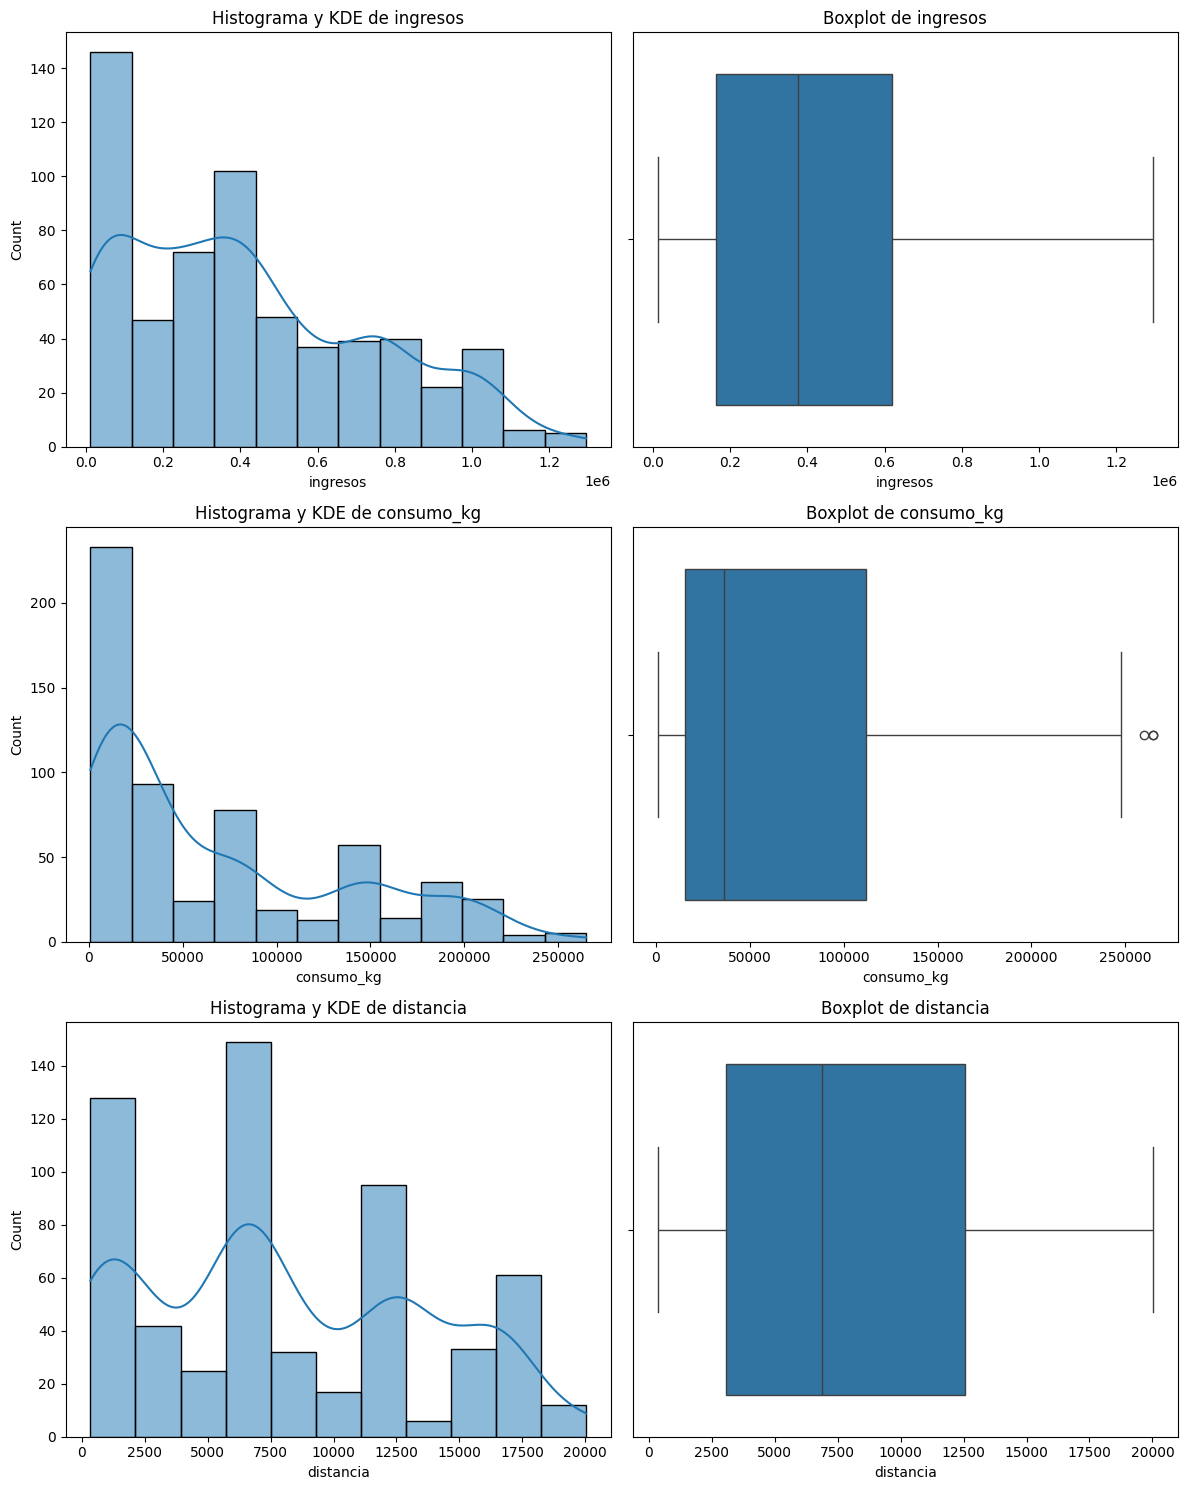

In [59]:
plot_combined_graphs(df_viajes,["ingresos","consumo_kg","distancia"])

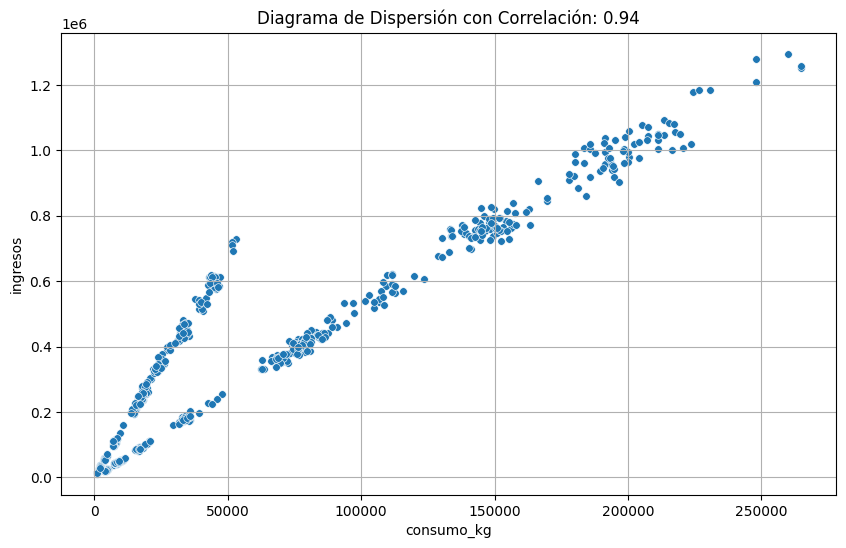

In [10]:
grafico_dispersion_con_correlacion(df_viajes,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

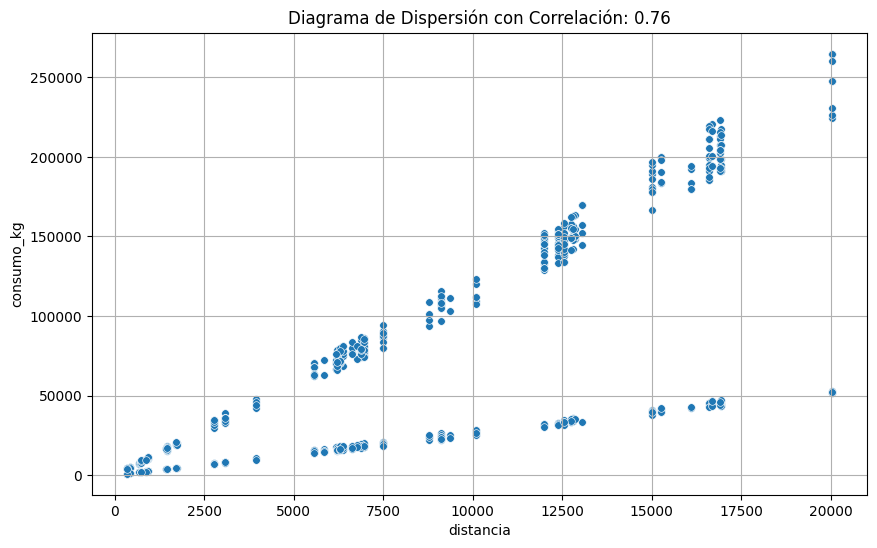

In [12]:
grafico_dispersion_con_correlacion(df_viajes,"distancia", "consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

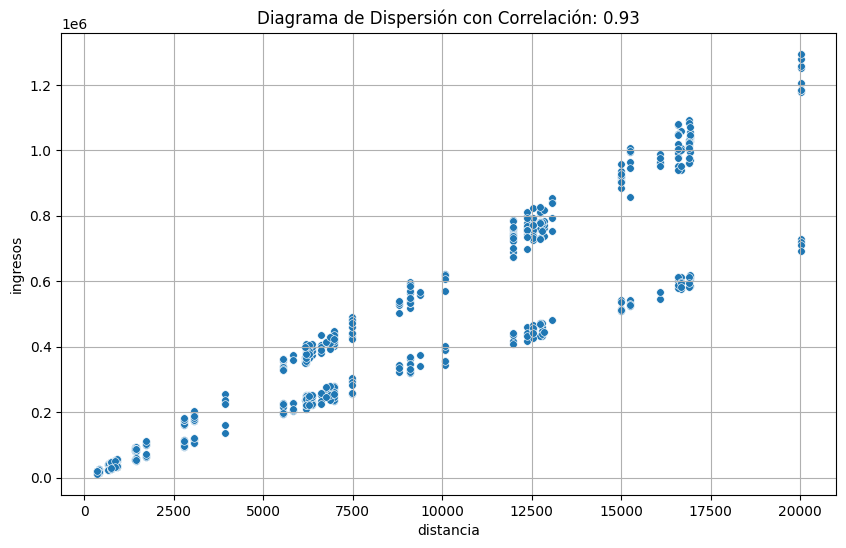

In [13]:
grafico_dispersion_con_correlacion(df_viajes,"distancia", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

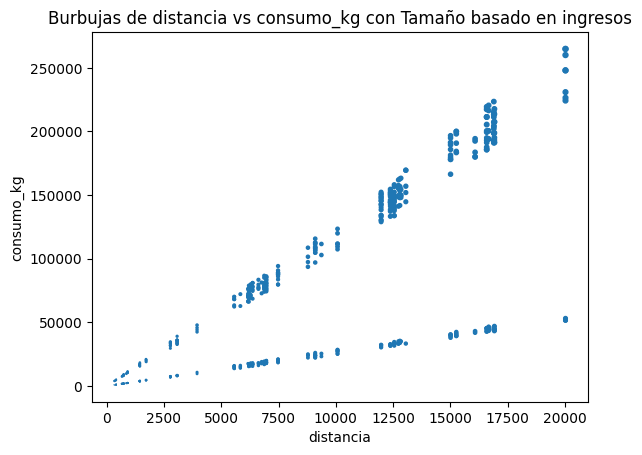

In [15]:
bubble_plot(df_viajes,"distancia","consumo_kg","ingresos", scale = 100000)

*Tras realizar este análisis vemos que hay una línea de vuelos que tienen muchos ingresos y consumen poco combustible (es decir, son más eficientes). También hay otra línea que, a pesar de realizar distancias largas, consume menos combustible que la media*

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [16]:
df_viajes.distancia.describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

(2,)


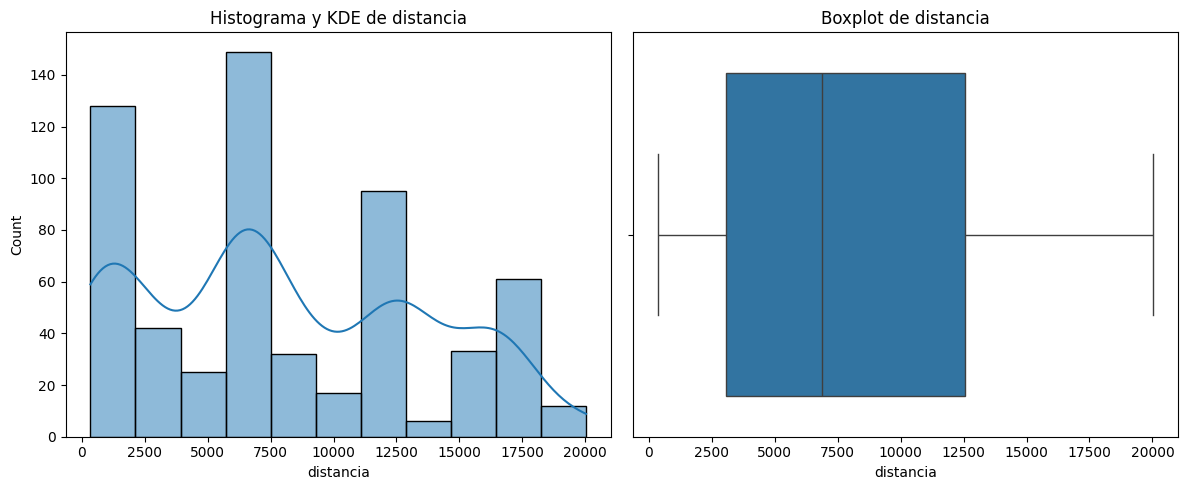

In [17]:
plot_combined_graphs(df_viajes, ["distancia"])

In [20]:
bins = [0, 5000, 12500, df_viajes.distancia.max()]
labels = ["Corta distancia", "Media distancia", "Larga distancia"]

df_viajes["cat_vuelo"] = pd.cut(df_viajes["distancia"], bins=bins, labels=labels)

Respuesta Corta distancia:


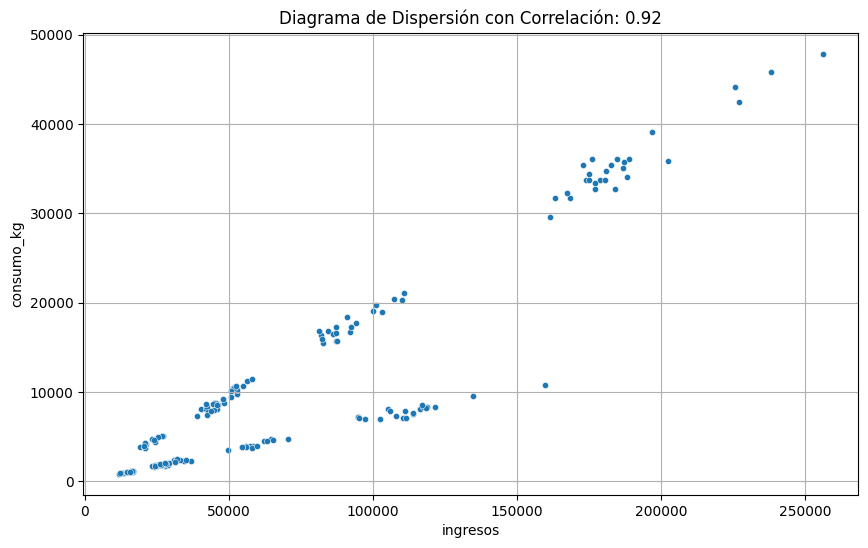

Respuesta Larga distancia:


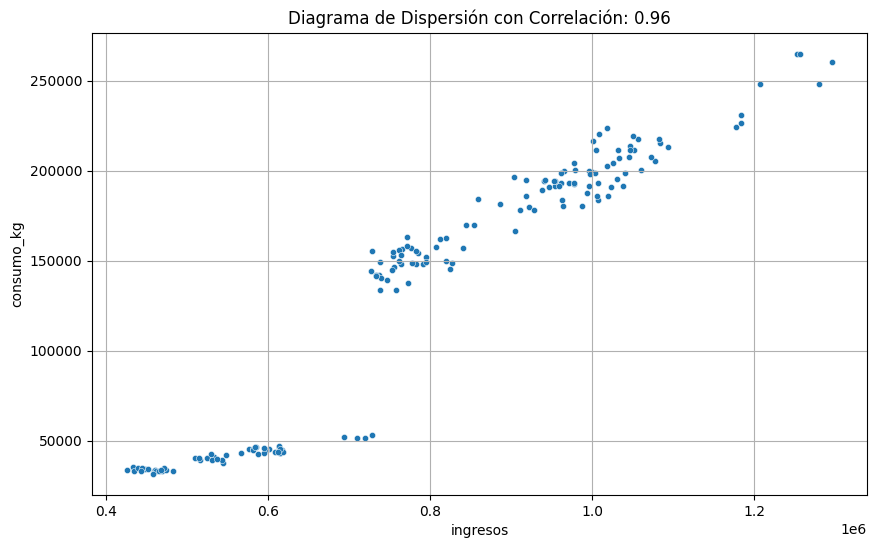

Respuesta Media distancia:


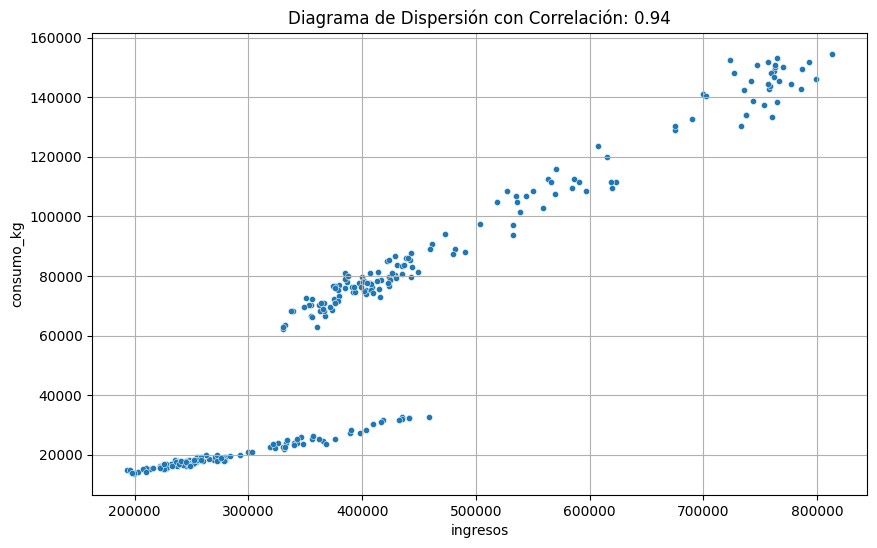

In [27]:
columnas = ["cat_vuelo","consumo_kg","ingresos"] 
col_directora = "cat_vuelo"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_viajes[col_directora].unique():
    diccionario_multivariante[valor] = df_viajes.loc[df_viajes[col_directora] == valor,[col_2,col_1]]

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

- *Podemos observar que hay un grupo de vuelos de media distancia que consumen poco y generan los mismos ingresos que otros vuelos de media distancia que consumen más del doble. Tendríamos que investigar esos vuelos en profundidad.*
- *En el grupo de larga distancia observamos otro grupo de vuelos que consumen de 3 a 5 veces menos que vuelos que generan más beneficio, pero no proporcional.*
- *Por último, en el grupo de corta distancia, también encontramos un grupo más eficiente, generando los mismos ingresos que vuelos que doblan su consumo.*

*La correlación indica que en los 3 grupos la tendencia es que a mayores ingresos, mayores consumos, exceptuando esos pequeños grupos que comentábamos antes.*

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.